In [82]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [83]:
matdat= loadmat('C:/Users/seroq/Desktop/MIKE X COHEN/MasterPython_CodeAndData/stateSpaceTrajectories/ALMdata.mat') 

In [84]:
Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]                     # Time vector
chandix = matdat['Channel_all']        # Tells us which rows in data matrix correspond to which
                                       # channel are which neurons
print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 


(None, None)

In [85]:
chandix = chandix.flatten()

In [86]:
print(chandix.shape)

(1186,)


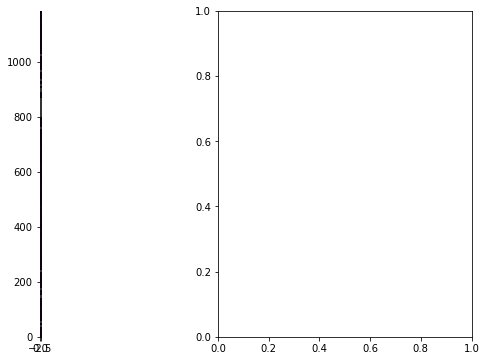

In [87]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(Nopr,extent=[t[0],t[-1],0,Nopr.shape[0]])    

#ax[0].imshow(Nopr,extent x axis by time, extent y axis by data)


# plt.show()

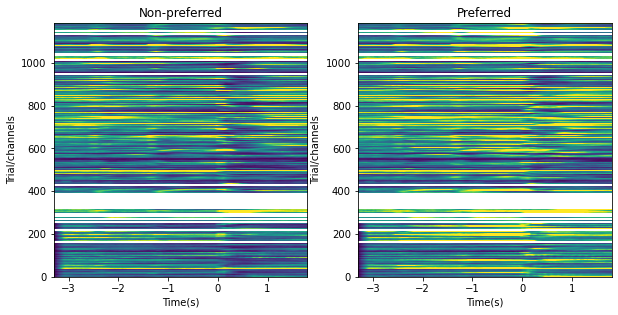

In [88]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(Nopr,extent=[t[0],t[-1],0,Nopr.shape[0]],vmin=0, vmax=10, origin = 'lower')    
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Trial/channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(Pref,extent=[t[0],t[-1],0,Pref.shape[0]], vmin=0, vmax=10, origin = 'lower')    
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Trial/channels')
ax[1].set_title('Preferred')

plt.show()

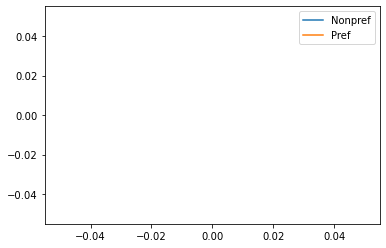

In [89]:
plt.plot(t, np.mean(Nopr, axis=0), label = "Nonpref")
plt.plot(t, np.mean(Pref, axis=0), label = "Pref")
plt.legend()
plt.show()

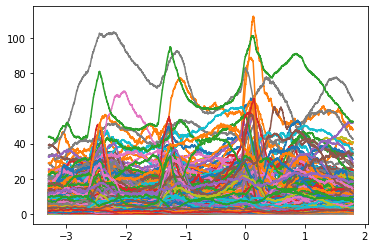

In [90]:
plt.plot(t,Nopr.T)

plt.show()

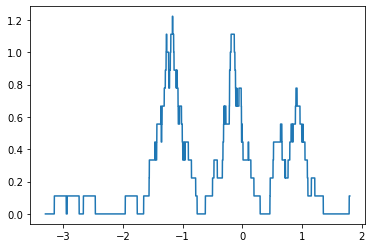

In [54]:
plt.plot(t,Nopr[380,:])

plt.show()

In [55]:
Nopr[380,:]

array([0.        , 0.        , 0.        , ..., 0.11111111, 0.11111111,
       0.11111111])

In [56]:
# we need to get rid of nan data

In [57]:
np.isfinite(np.nan)

False

In [91]:
Nopr = Nopr[np.isfinite(Nopr[:,0]),:] # Getting rid of nan values
print(Nopr.shape)

chandix = chandix[np.isfinite(Pref[:,0])]

Pref = Pref[np.isfinite(Pref[:,0]),:] # Getting rid of nan values
print(Pref.shape)





(1111, 5101)
(1111, 5101)


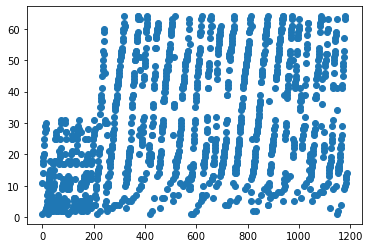

In [59]:
plt.plot(chandix,'o')

In [76]:
# Create channel covariance matrix

In [77]:
# we have to create new data matrices because we do not have our data in good form yet

In [78]:
# compute new data matrices
# we need two of them averaging all of the repetations

In [79]:
chandix ==1

array([ True, False, False, ..., False, False, False])

In [97]:
nchans = np.max(chandix)

chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))

for i in range(1, nchans+1):
    chanaveNopr[i-1,:] = np.mean(Nopr[chandix==i,:],axis=0)
    chanavePref[i-1,:] = np.mean(Pref[chandix==i,:],axis=0)

print(chanaveNopr.shape)

(64, 5101)


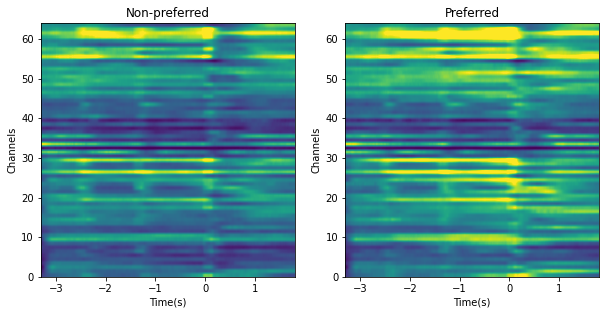

In [98]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(chanaveNopr,extent=[t[0],t[-1],0,nchans],vmin=0, vmax=10, origin = 'lower')    
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(chanavePref,extent=[t[0],t[-1],0,nchans], vmin=0, vmax=10, origin = 'lower')    
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Channels')
ax[1].set_title('Preferred')

plt.show()

In [105]:
# Compute covairance matrices

covmatPref = np.cov(chanavePref)
covmatNopr = np.cov(chanaveNopr)

covmat = (covmatNopr + covmatPref) /2

covmatPref.shape

(64, 64)

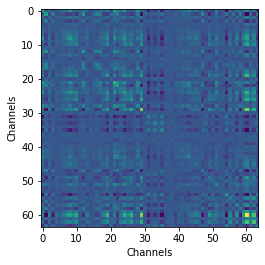

In [106]:
plt.imshow(covmatPref)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

In [107]:
# Run PCA and compute components

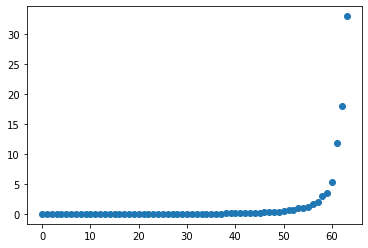

In [108]:
eigenvalues, eigenvectors = np.linalg.eigh(covmat)

plt.plot(eigenvalues, 'o')

[63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40
 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16
 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


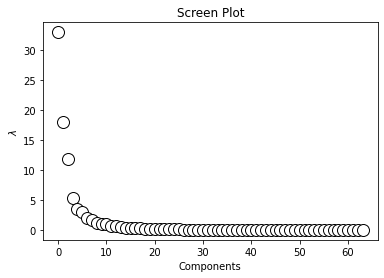

In [114]:
eigenvalues, eigenvectors = np.linalg.eigh(covmat)

sidx = np.argsort(eigenvalues)[::-1]
print(sidx)

eigenvalues = eigenvalues[sidx]
eigenvectors = eigenvectors[:,sidx]

plt.plot(eigenvalues, 'ko', markerfacecolor ='w', markersize=12 )
plt.xlabel('Components')
plt.ylabel("$\lambda$")
plt.title('Screen Plot')

plt.show()

In [122]:
for i in range(2):
    # Find the largest component magnitude
    maxi = np.argmax(abs(eigenvectors[i]))
    eigenvectors[:,i] *= np.sign(eigenvectors[maxi, i])

In [123]:
# Compute Principal Component Time Series

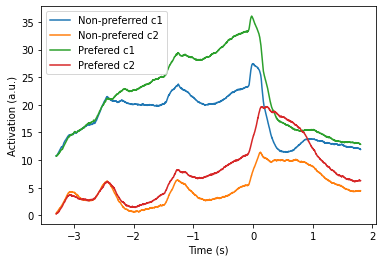

In [128]:
pcNopr = eigenvectors[:,0:2].T @ chanaveNopr
pcPref = eigenvectors[:,0:2].T @ chanavePref

plt.plot(t, pcNopr.T,t, pcPref.T)

plt.legend(['Non-preferred c1', 'Non-prefered c2', 'Prefered c1', 'Prefered c2'])
plt.xlabel('Time (s)')
plt.ylabel('Activation (a.u.)')

plt.show()

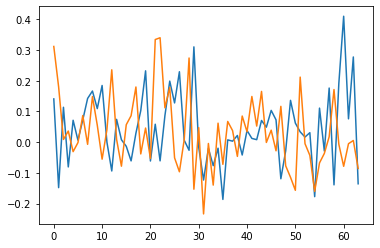

In [125]:
plt.plot(eigenvectors[:,0:2])

In [ ]:
# Create the state-space trajectories

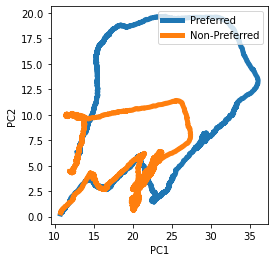

In [132]:
plt.plot(pcPref[0,:],pcPref[1,:], linewidth = 5, label= 'Preferred')
plt.plot(pcNopr[0,:],pcNopr[1,:], linewidth = 5, label = 'Non-Preferred')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()

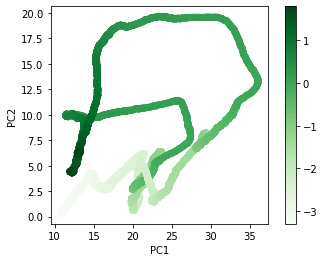

In [134]:
# Draw time as Hue

plt.scatter(pcNopr[0,:],pcNopr[1,:],cmap='Greens', c=t) # c = t color depends on time
plt.scatter(pcPref[0,:],pcPref[1,:],cmap='Greens', c=t) # c = t color depends on time

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.colorbar()

plt.show()

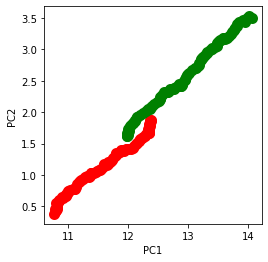

In [139]:
plt.scatter(pcNopr[0,0:100],pcNopr[1,0:100],color='r', linewidth = 5, label = 'Non-Preferred')
plt.scatter(pcPref[0,101:200],pcPref[1,101:200],color='g', linewidth = 5, label = 'Preferred')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())


plt.show()